In [1]:



import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from pymongo import MongoClient
from array import array
from heapq import nlargest
import warnings
import itertools
import statsmodels.api as sm



In [16]:

df = pd.read_csv('D:\\prediction\\daily-total-female-births.csv', index_col=[0],parse_dates=[0],squeeze=True)
df.head(5)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [17]:
type(df)
# you need series for time series analysis

pandas.core.series.Series

In [18]:
df = pd.read_csv('D:\\prediction\\daily-total-female-births.csv', index_col=[0],parse_dates=[0])
df.head(5)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [19]:
type(df)


pandas.core.frame.DataFrame

In [20]:
series_value=df.values
series_value

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [21]:
type(series_value)

numpy.ndarray

In [22]:
series_value.size

365

In [23]:
df.size

365

In [25]:
df.tail(5)

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [26]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


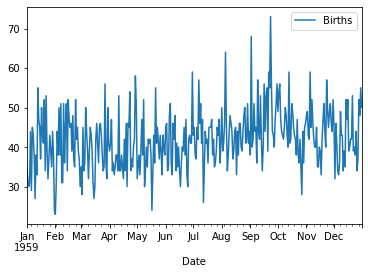

In [27]:
df.plot()

In [28]:
# moving average
#  rolling 20 day average  (window = 20(days))  30 means 30 days mean
df_mean=df.rolling(window=20).mean()

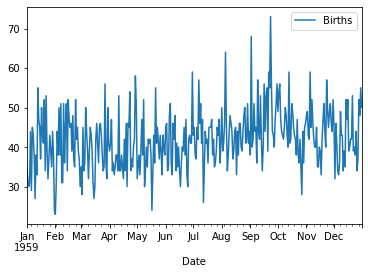

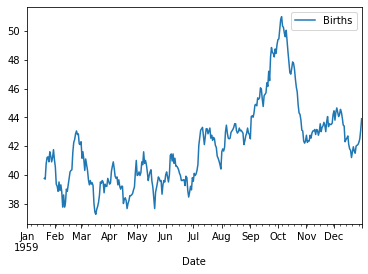

In [29]:
df.plot()
df_mean.plot()

In [50]:
value=pd.DataFrame(series_value)

In [51]:
# Difference
df_diff=pd.concat([value,value.shift(1)],axis=1)

In [52]:
df_diff.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [53]:
df_diff.columns=['Actual_Birth','Forecast_birth']

In [54]:
df_diff.head()

,Actual_Birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [55]:
#remove NaN 
df_test=df_diff[1:]
df_test.head(5)


,Actual_Birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
birth_error=mean_squared_error(df_test.Actual_Birth,df_test.Forecast_birth)

In [58]:
birth_error

84.22252747252747

In [59]:
np.sqrt(birth_error)

9.177283229394606

In [ ]:
#ARIMA
#moving average--> smoothing part like removing errors
#Auto regression--> the current value is corelated with the previous value, previous values is the best reflaction of the current value....that is how well they the values are related  to each other
# Integrated---> the order of difference, i.e time series should be stationary (d--> difference)

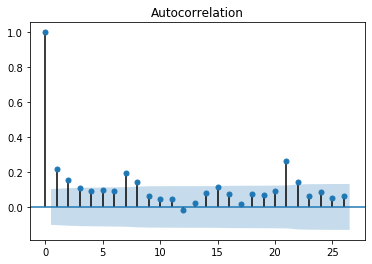

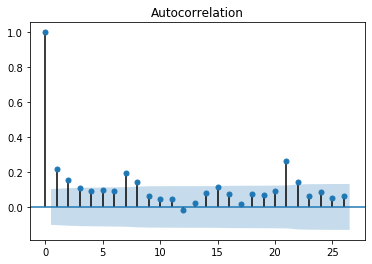

In [61]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#plot_acf is to identify parameter Q
#ARIMA(p,d,q)
plot_acf(df)

In [ ]:
#Converting Series to Stationary

plot_acf(df_test)

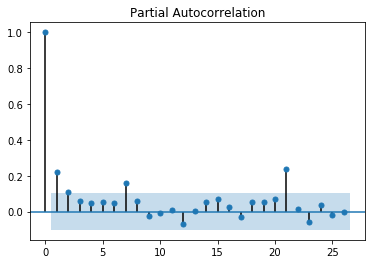

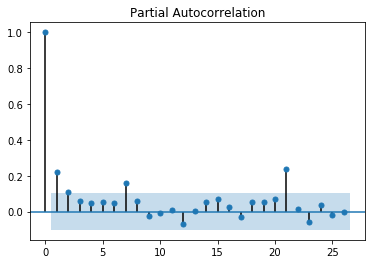

In [62]:
#plot_pacf is to identify parameter p
#ARIMA(p,d,q)
plot_pacf(df)

In [ ]:
#Converting Series to Stationary
plot_pacf(df_test)

In [63]:
#p=2,3 d=0  q=3,4

df.size

365

In [64]:
birth_train=df[0:330]
birth_test=df[330:365]

In [65]:
birth_train.size


330

In [66]:
birth_test.size

35

In [87]:
# ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

In [89]:
birth_model=ARIMA(birth_train,order=(3,1,3))

In [90]:
birth_model_fit=birth_model.fit()

In [85]:
birth_model_fit.aic

2225.7894266092785

In [75]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [76]:
birth_forecast

array([45.30384103, 46.31074405, 43.64963085, 44.59236349, 46.49718319,
       44.34363874, 44.09002194, 46.34404451, 45.07550376, 43.88123853,
       45.95230735, 45.69592493, 43.97415625, 45.45691696, 46.10393962,
       44.31151816, 44.99252023, 46.26036906, 44.79363348, 44.6649282 ,
       46.1859242 , 45.30655668, 44.5334176 , 45.94690945, 45.74863534,
       44.60583748, 45.6336096 , 46.05006   , 44.84544317, 45.33715779,
       46.18242208, 45.1860684 , 45.13004688, 46.15790218, 45.55103601])

In [77]:
birth_test

,Births
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [78]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.860031644571154

In [81]:
#     video tutorial for this example
#  https://www.youtube.com/watch?v=MmC4b7gPY0Q

In [79]:
import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [82]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(birth_train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 2262.339479873941
(0, 0, 1) 2252.1193839939474
(0, 0, 2) 2249.212128471333
(0, 0, 3) 2248.4157055011265
(0, 0, 4) 2249.709648565081
(0, 0, 5) 2251.282280353659
(0, 0, 6) 2253.28086050878
(0, 0, 7) 2248.94285919101
(0, 0, 8) 2245.826527575661
(0, 1, 0) 2404.828232881607
(0, 1, 1) 2230.7473535157146
(0, 1, 2) 2229.0976539246817
(0, 2, 0) 2751.529036816826
(0, 2, 1) 2406.325414989883
(1, 0, 0) 2249.0606751992127
(1, 0, 1) 2236.641406687597
(1, 1, 0) 2325.9670177917474
(1, 1, 1) 2228.633048329225
(1, 1, 2) 2230.3559439755422
(1, 1, 3) 2229.7189240868606
(1, 1, 4) 2229.5826166158845
(1, 1, 5) 2231.306724939448
(1, 1, 6) 2233.0730613580836
(1, 1, 7) 2235.0593226364044
(1, 2, 0) 2570.657019586825
(2, 0, 0) 2246.2726148492575
(2, 0, 1) 2235.6305011179165
(2, 0, 2) 2236.356012648671
(2, 1, 0) 2297.6613099649935
(2, 1, 1) 2229.141485367713
(2, 1, 2) 2229.8453122738474
(2, 1, 3) 2230.94824901245
(2, 1, 4) 2235.036034907278
(2, 1, 5) 2235.4174121295264
(2, 1, 6) 2256.2944427378893
(2, 1,

In [1]:
#     video tutorial for this example
#  https://www.youtube.com/watch?v=MmC4b7gPY0Q

In [91]:
# Arima model intilation

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 365) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 365)
SARIMAX: (0, 0, 1) x (0, 0, 2, 365)
SARIMAX: (0, 0, 2) x (0, 0, 3, 365)
SARIMAX: (0, 0, 2) x (0, 1, 0, 365)


In [ ]:
# applly the data model 

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(birth_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

MemoryError: 

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 946, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError


In [ ]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

In [ ]:
# Let's fit this model

mod = sm.tsa.statespace.SARIMAX(birth_train,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [ ]:
birth_forecast=results.forecast(steps=35)[0]